In [1]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [7]:
def f(x1, x2):
    val = 5*x1**2 + x2**2 + 4*x1*x2 - 14*x1 - 6*x2 + 20
    
    return val

def gradient(x1, x2):
    partial_x1 = 10*x1 + 4*x2 - 14
    partial_x2 = 2*x2 + 4*x1 - 6
    
    return np.array([partial_x1, partial_x2])

def diff_h(alpha):
    gradient_x1 = gradient(x1, x2)[0]
    gradient_x2 = gradient(x2, x2)[0]
    descent = -gradient(x1, x2)
    
    new_gradient_x1 = (gradient(x1 + alpha*descent[0], x2 + alpha*descent[1])[0]) * descent[0]
    new_gradient_x2 = (gradient(x1 + alpha*descent[0], x2 + alpha*descent[1])[0]) * descent[1]
    
    return gradient_x1 * new_gradient_x1 + gradient_x2 * new_gradient_x2

def bi_search(x1, x2, eps=1e-4):
    alpha_low = 0
    alpha_hi = 5
    alpha = (alpha_low + alpha_hi) / 2
    
    while abs(diff_h(alpha)) > eps:
        if diff_h(alpha) > 0:
            alpha_hi = alpha
        else:
            alpha_low = alpha
            
        alpha = (alpha_low + alpha_hi) / 2
        
    return alpha

In [17]:
def grad_desc(f, gradient, x_start, alpha=0.01, line_search=None, eps=1e-5, max_iter=10000):
    x_cur = x_start
    history_x = [np.array(x_cur)]
    history_f = [f(*x_start)]

    for i in range(max_iter):
        descent = -gradient(*x_cur)
        if line_search is not None:
            alpha = alpha * line_search(*x_cur)

        x_cur += alpha * descent
        f_cur = f(*x_cur)

        history_x.append(deepcopy(x_cur))
        history_f.append(f_cur)
    
        if history_f[-2] - history_f[-1] < eps:
            break
            
    return history_x, history_f

In [4]:
history_x, history_f = grad_desc(f, gradient, [5, 10])

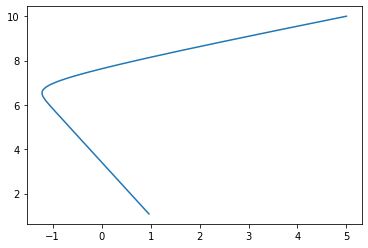

In [5]:
x1 = np.array(history_x)[:, 0]
x2 = np.array(history_x)[:, 1]
plt.plot(x1, x2)
plt.show()

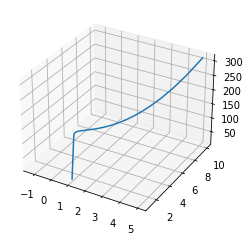

In [6]:
ax = plt.axes(projection='3d')
ax.plot3D(x1.tolist(), x2.tolist(), history_f)
plt.show()